<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Confidence Intervals
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 13</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### First a more thorough treatment of Central Limit Thorem

- Measuring $X$ (e.g., calls per min at call center) in population:
    - follows some distribution (Poisson)
    - population mean $\mu$
    - population variance $\sigma^2$

- $X$ is a random variable.

Can rescale/shift:

$$ Y = \frac{X - \mu}{\sigma} $$

- measures how far individual is from population mean in unit of standard deviation of population 

Rescaled/shift:

$$ Y =  \frac{X - \mu}{\sigma} $$

- Mean of $Y$ over population is 0.
- Standard deviation of $Y$ is 1.

Take a sample of size N : $X_1, X_2,...,X_N$

After shifting by population mean and rescaling by population standard deviation:

$$ Y_1,Y_2,...Y_N $$

#### A more precise statement of the central limit theorem:

If a random variable $Y_i$ has mean 0 and variance 1, then for sufficiently large $N$:

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

is normally distributed with mean 0 and standard deviation 1.

In [354]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

In [364]:
average_count_min = 2.5
# for Poisson turns out variance is equal to mean
var_count_min = average_count_min

sample_trial = poisson.rvs(mu = average_count_min, size = 250)

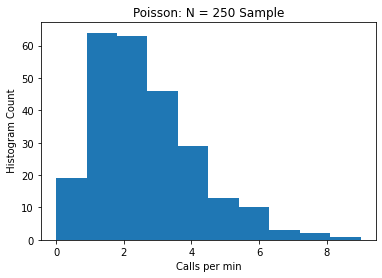

In [365]:
plt.hist(sample_trial)
plt.xlabel('Calls per min')
plt.ylabel(' Histogram Count')
plt.title('Poisson: N = 250 Sample')
plt.show()

In [366]:
sample_trial.mean()

2.46

In [367]:
sample_trial.var()

2.8884

Now conduct rescaling/shifting of sample:

$$ Y = \frac{X - \mu}{\sigma} $$

In [368]:
rescaled_sample = (sample_trial - average_count_min)/np.sqrt(var_count_min)

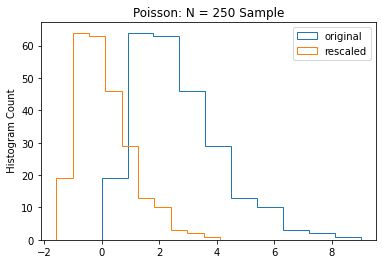

In [369]:
fig,ax = plt.subplots()
ax.hist(sample_trial, histtype = 'step', label = 'original' )
ax.hist(rescaled_sample, histtype = 'step', label = 'rescaled')
plt.ylabel(' Histogram Count')
plt.title('Poisson: N = 250 Sample')
plt.legend()
plt.show()

In [370]:
rescaled_sample.mean()

-0.02529822128134704

In [371]:
rescaled_sample.std()

1.0748767371191916

Now, get sum of rescaled sample divided by square root of number of samples:

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

But let's do this for many trials of N-samples to build up statistics on $S_N$.

In [372]:
# standard deviation
std_count_min = np.sqrt(var_count_min)
# repeat sampling and for each sample subtract by population mean and divide by standard deviation.
many_rescaled_sample_trials = [(poisson.rvs(mu = average_count_min, size = 250) - average_count_min)/ std_count_min
                      for trial in range(10000)]


Compute the sum of each sample and divide by square root of the number in each sample.

- Gets a list of possible $S_N$


In [373]:
# compute the sum of each sample and divide by square root of the number in each sample
Sn_array = np.array([np.sum(sample)/np.sqrt(len(sample)) for sample in many_rescaled_sample_trials])

Central limit theorem tells me $S_n$ normally distributed:
- Mean 0 
- Standard deviation 1

Is this true for our data?

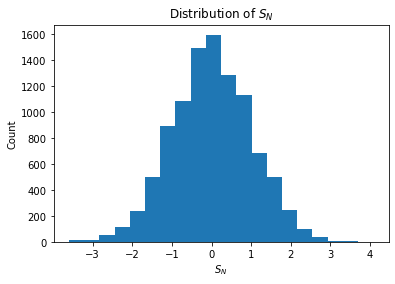

In [374]:
plt.hist(Sn_array, bins = 20)
plt.xlabel('$S_N$')
plt.ylabel('Count')
plt.title('Distribution of $S_N$')
plt.show()

In [375]:
Sn_array.mean()

0.01281999999999996

In [376]:
Sn_array.std()

1.008015380636625

We have just seen that:

Provided N large enough

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

is distributed normal with mean 0, std 1.

The real life situation:

- I have $N$ samples of a measurement: the counts per min.

- Calculate sample mean (average of $X_i$ in sample)

$$ \bar{X} = \frac{X_1 + X_2 + ... + X_N}{N}$$


How are these two related?

$$ \bar{X} = \frac{X_1 + X_2 + ... + X_N}{N}$$

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$

$$ S_N = \frac{Y_1 + Y_2 + ... Y_n}{\sqrt{N}} $$
<br><br>
$$ S_N = \frac{(X_1 - \mu) + (X_2 - \mu) + ... (X_N - \mu)}{\sigma\sqrt{N}} $$


$$ S_N = \frac{(X_1  + X_2  + ... + X_N) - N \mu }{\sigma\sqrt{N}} $$

but since:

$$ \bar{X} = \frac{X_1 + X_2 + ... + X_N}{N}$$


$$ S_N = \frac{N \bar{X} - N \mu }{\sigma\sqrt{N}} $$
$$ S_N = \frac{ \bar{X} - \mu }{\frac{\sigma}{\sqrt{N}}} $$

$$ S_N = \frac{ \bar{X} - \mu }{\frac{\sigma}{\sqrt{N}}} $$ is normally distributed with mean 0 and std 1.

Doing the reverse scale transformation implies:
    
- $ \bar{X} $ is normally distributed:
    <center>mean of sample $\bar{X}$ is population mean </center> $$ \mu $$
    <center> standard deviation is of $\bar{X}$ is: </center>
    $$ \frac{\sigma}{\sqrt{N}} $$

- $ \bar{X} $ is normally distributed:
    <center>mean of sample $\bar{X}$ is population mean </center> $$ \mu $$
    <center> standard deviation is of $\bar{X}$ is: </center>
    $$ \frac{\sigma}{\sqrt{N}} $$
    
Remember: $\sigma$ was **population** standard deviation.

**Question** as N goes large

- Repeat many samples of size $N$. Get $\bar{X}$ for each.
- What happens to my spread on $\bar{X}$ as $N$ goes large?


<center> mean of sample $\bar{X}$ is population mean </center> $$ \mu $$
    <center> standard deviation is of $\bar{X}$ is: </center>
    $$ \frac{\sigma}{\sqrt{N}} $$
    

Let's see this in action:

- Counting calls / min at toll center.
- Take samples of different sizes.

Get distribution of $\bar{X}$ for different sampling sizes:

In [295]:
N_list = [50, 250, 1000]

Repeat trials for each sample size 10,000 times to build statistics on $\bar{X}$.

In [377]:
# construct 10000 trials of N samples.
def poisson_trials_Nsamples(avg_count, N_list, num_trials):
    
    for N in N_list:
        
        Nsample_trial_list =  [poisson.rvs(mu = average_count_min, size = N).mean() for trials in range(num_trials)]
        
        
        plt.hist(Nsample_trial_list, density = True, histtype = 'step',  label = "N = " + str(N))
    
    plt.axvline(avg_count, c = 'b', linewidth =2, linestyle = '--')
    plt.legend()
    plt.show()
        


- True average call rate: 2.5 calls per minute on average.
- Taking samples of various size: 

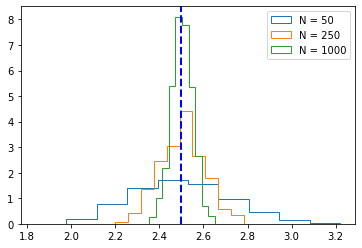

In [378]:
poisson_trials_Nsamples(2.5, N_list, 1000)

Distribution of sample means gets sharper and sharper around the true population mean!!!

- For sample size $N$: 
    - can now quantify our uncertainty of $\bar{X}$
    - given population mean $\mu$

**But usually:**

- No idea what the population mean is.
- Using sampling to estimate the population mean.

Given a single sample of $N$ measurements:
- Get a value of $\bar{X} = \bar{X}_0 $.
- Given $\bar{X} = \bar{X}_0 $:
    - Estimate uncertainty in $\bar{X}$
    - Equivalent to getting range estimate of unknown population mean.

This range is the **confidence interval**.

In [340]:
N = 100
one_sample = poisson.rvs(mu = 2.5, size = N)

##### N = 50 sample of call center counts/min.

In [379]:
one_sample

array([2, 3, 2, 1, 0, 3, 2, 2, 4, 1, 0, 2, 0, 2, 2, 5, 0, 3, 3, 2, 2, 4,
       3, 5, 3, 3, 1, 1, 2, 2, 0, 1, 3, 3, 2, 0, 3, 3, 4, 1, 0, 2, 1, 3,
       4, 3, 0, 3, 4, 1, 2, 2, 0, 4, 1, 4, 6, 3, 1, 1, 2, 3, 3, 3, 2, 4,
       4, 2, 3, 3, 2, 1, 4, 2, 1, 3, 1, 6, 2, 5, 4, 2, 3, 6, 1, 1, 1, 3,
       3, 4, 2, 4, 3, 4, 1, 7, 4, 3, 2, 1])

In [380]:
Xbar_0 = one_sample.mean()
Xbar_0

2.45

#### The confidence interval is defined with respect to a probability
- Confidence interval at 0.95 implies:
    - Given sample mean $\bar{X_0}$.
    -  What is region of $\bar{X}$ assuming $\bar{X_0}$ is population mean accounting for 95\% of probability?
    - Same as range accounting for 95% of unknown population means.

Provide $N$ is large enough: 
CLT give us ability to make some statements about range!
- In most cases: sample standard deviation $s \approx \sigma$ 
- $\bar{X}$ would then be distributed normally with mean $\bar{X}_0$ and std $\frac{\sigma}{\sqrt{N}}$

To get 95% confidence interval for normal:

$$ \bar{X_0} \pm 1.96\frac{\sigma}{\sqrt{N}} $$

Let's see.

In [381]:
sigma_N = one_sample.std()/(np.sqrt(N))
half_range = 1.96*sigma_N
half_range

0.2912100959788311

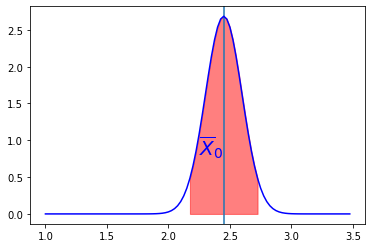

In [382]:
x_vals = np.arange(1.0, 3.5, .025)

y_vals_gauss = norm.pdf(x_vals, loc = Xbar_0, scale = sigma_N)
plt.fill_between(x_vals, y_vals_gauss, where = (Xbar_0 - half_range < x_vals) & (Xbar_0 + half_range > x_vals), alpha = 0.5, color='r')
plt.axvline(Xbar_0)
plt.annotate("$\overline{X}_0$", c ='b', xy = (2.25, 0.8), fontsize = 20)
plt.plot(x_vals, y_vals_gauss, c = 'b')

plt.show()


Probability that repeated samples will have $\bar{X}$ falling with this range: 

In [349]:
p2 = norm.cdf(Xbar_0 + half_range, loc = Xbar_0, scale = sigma_N)
p1 = norm.cdf(Xbar_0- half_range , loc = Xbar_0, scale = sigma_N)

p_in_95CI = p2 - p1

p_in_95CI

0.950004209703559

Thus my measured estimate of the population mean is  mean $\bar{X}_0 $:

In [346]:
Xbar_0

2.45

With a range of uncertainty in $\bar{X}$ (and thus population mean)

In [347]:
(Xbar_0 - half_range, Xbar_0 + half_range)

(2.158789904021169, 2.7412100959788313)

at the 95\% confidence interval.

95% confidence that true population mean lies in this interval.

Can also report results of confidence intervals at different levels of confidence:


Higher levels of confidence mean larger ranges of $\bar{X}$.


- e.g. 99\% confidence interval:
$$ \bar{X_0} \pm 2.576\frac{\sigma}{\sqrt{N}} $$
- 99.5\% confidence interval:
$$ \bar{X_0} \pm 2.807\frac{\sigma}{\sqrt{N}} $$
- 99.9% confidence interval:
$$ \bar{X_0} \pm 3.291\frac{\sigma}{\sqrt{N}} $$


What happens to my confidence intervals as N increases?

From a finite sample:

- Estimated average counts/min at toll
- Also estimated range of values average count could lie in attached to a certain confidence level.

**Statistics, probability**

- Enabled us to start quantifying uncertainty in data in a principled way.
- This is the *essence* of the scientific method!

If I measure a thing, how certain am I that it is the value I say?

Could it be other values?

Range of values it could be quantifying my confidence.